In [47]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [48]:
data_test_target = pd.read_csv('gender_submission.csv')
data_train = pd.read_csv('train.csv')
data_train = data_train.replace(["female","male"],[0,1])
data_train = data_train.replace(["S","C","Q"],[0,1,2])
data_train = data_train.fillna(10)
X_train = np.array(data_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])
Y_train = np.array(data_train[['Survived']])

data_test = pd.read_csv('test.csv')
data_test = data_test.replace(["female", "male"], [0, 1])
data_test = data_test.replace(["S", "C", "Q"], [0, 1, 2])
Y_test = data_test_target[['Survived']]
X_test = data_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_test = np.nan_to_num(X_test)
Y_test = np.nan_to_num(Y_test)

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,10,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,10,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,10,0.0


In [49]:
Y_train = np.array(Y_train)
X_train = np.array(X_train)

Y_test = np.array(Y_test)
X_test = np.array(X_test)

In [53]:
#model
model = tf.keras.models.Sequential([
     tf.keras.layers.Dense(7,activation="relu"),
     tf.keras.layers.Dense(450,activation="relu"),
     tf.keras.layers.Dense(980,activation="sigmoid"),
     tf.keras.layers.Dense(540,activation="relu"),
    tf.keras.layers.Dense(58,activation="relu"),
     tf.keras.layers.Dense(2,activation="softmax"),
])

In [54]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])

In [55]:
output = model.fit(X_train,Y_train ,epochs=300)
model.save('titanic.h5')

Epoch 1/300
28/28 [==============================] - 1s 8ms/step - loss: 0.6570 - accuracy: 0.6162
Epoch 2/300
28/28 [==============================] - 0s 8ms/step - loss: 0.6347 - accuracy: 0.6476
Epoch 3/300
28/28 [==============================] - 0s 8ms/step - loss: 0.6268 - accuracy: 0.6745
Epoch 4/300
28/28 [==============================] - 0s 8ms/step - loss: 0.6203 - accuracy: 0.6835
Epoch 5/300
28/28 [==============================] - 0s 8ms/step - loss: 0.6163 - accuracy: 0.6835
Epoch 6/300
28/28 [==============================] - 0s 9ms/step - loss: 0.6148 - accuracy: 0.6801
Epoch 7/300
28/28 [==============================] - 0s 8ms/step - loss: 0.6121 - accuracy: 0.6835
Epoch 8/300
28/28 [==============================] - 0s 8ms/step - loss: 0.6108 - accuracy: 0.6768
Epoch 9/300
28/28 [==============================] - 0s 8ms/step - loss: 0.6105 - accuracy: 0.6768
Epoch 10/300
28/28 [==============================] - 0s 8ms/step - loss: 0.6099 - accuracy: 0.6756
Epoch 11/

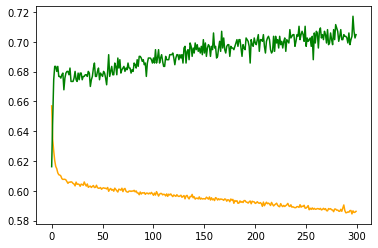

In [56]:
plt.plot(output.history['loss'], c='orange')
plt.plot(output.history['accuracy'], c='g')

In [57]:
model=tf.keras.models.load_model('titanic.h5')

# KNN

In [58]:
my_knn = KNeighborsClassifier(n_neighbors=127)
Y_train_flatten = Y_train.flatten()
my_knn.fit(X_train, Y_train_flatten)
Y_pred = my_knn.predict(X_test)
Y_test_flatten = Y_test.flatten()
accuracy = accuracy_score(Y_test_flatten, Y_pred)
accuracy

0.6555023923444976

# MLP

In [59]:
mlp = MLPClassifier(random_state=5, max_iter=300).fit(X_train, Y_train)
mlp.predict_proba(X_test)
mlp.predict(X_test)
accuracy = mlp.score(X_test, Y_test)
accuracy

c:\users\sisto.desktop-75v44of\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7703349282296651

# Perceptron

In [60]:
p = Perceptron(random_state=95)
p.fit(X_train, Y_train)

Y_pred = p.predict(X_test)
score = accuracy_score(Y_test, Y_pred)
score

c:\users\sisto.desktop-75v44of\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8133971291866029